In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
from RobotSim373 import *

In [61]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object
    
    robot.current_force=0
    robot.current_force_angle=0
    robot.time_to_next_decision=0
    
    

In [62]:
def act(t,robot):
    
    return


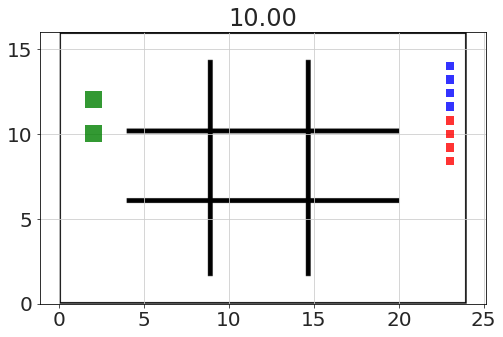

In [68]:
env=Environment(image='images/TTT Board.png',linearDamping=10) 
robot=Robot(env)

build(robot)

pieces=[]
y=14
for i in range(4):
    pieces.append(Box(env,23,y,width=0.5,height=0.5))
    y-=0.8
    
for i in range(4):
    pieces.append(Box(env,23,y,width=0.5,height=0.5,color='r'))
    y-=0.8


run_sim(env,act,
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

In [69]:
def move_to_location(move):
    row,col=move//3, move%3
    
    x=col*6+6
    y=13-5*row
    
    return x,y

In [70]:
move_to_location(2)

(18, 13)

In [71]:
def move(piece,location):
    
    def act(t,robot):
        
        x,y=piece.x,piece.y
        tx,ty=location
        
        d=sqrt((tx-x)**2+(ty-y)**2)
        angle=degrees(arctan2((ty-y),(tx-x)))
        
        k=1
        piece.F=k*d
        piece.F_angle=angle
        
        robot.message=piece.F_angle
            
    return act
        

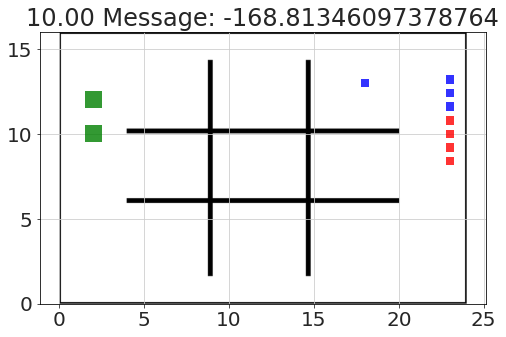

In [72]:

run_sim(env,move(pieces[0],move_to_location(2)),
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

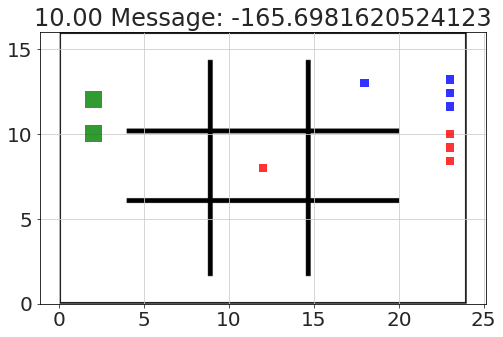

In [73]:

run_sim(env,move(pieces[4],move_to_location(4)),
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

## try with setting the location (making a new object in the act function)

In [74]:
def set_piece(location,player):
    
    def act(t,robot):
        
        if t==0.0:
            colors=['b','r']
            tx,ty=location
            Box(robot.env,x=tx,y=ty,width=0.5,height=0.5,color=colors[player-1])
        
            robot.message="Player %d at %.1f,%.1f" % (player,tx,ty)
            
    return act

def act(t,robot):
    
    return


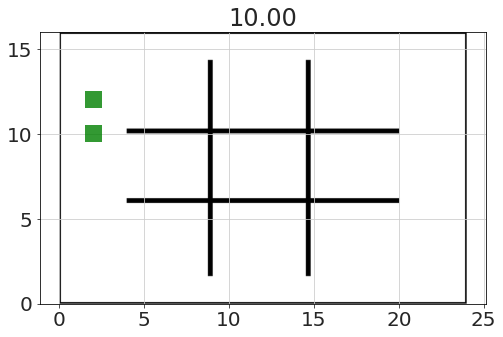

In [75]:
env=Environment(image='images/TTT Board.png',linearDamping=10) 
robot=Robot(env)

build(robot)


run_sim(env,act,
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

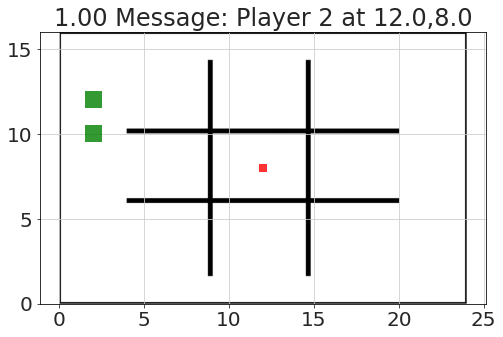

In [76]:

run_sim(env,set_piece(move_to_location(4),2),
        total_time=1,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

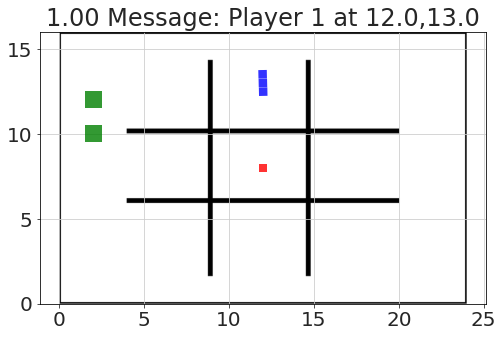

In [79]:
run_sim(env,set_piece(move_to_location(1),1),
        total_time=1,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )